# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [0]:
tf.__version__

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

### Preprocessing the Test set

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

## Part 2 - Building the CNN

### Initialising the CNN

In [0]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [0]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [0]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [0]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [0]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [0]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [0]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [0]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [0]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

## Part 4 - Making a single prediction

In case you have the trained <model_name>.h5 file then run from the cell below alone excluding the training part

In [2]:
from tensorflow import keras

cnn = keras.models.load_model('cats_and_dogs.h5')

the prediction is: DOG


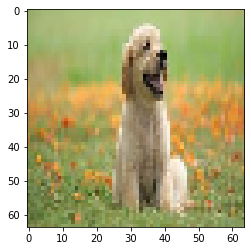

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

test_image = image.load_img('download.jpg', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print("the prediction is:" , prediction.upper())